In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Functions

In [5]:
def g1(x):
    return (np.square(x)+2)/3

def g2(x):
    return np.sqrt(3*x-2)

def g3(x):
    return 3 - 2/x

def g4(x):
    return (np.square(x)-2)/(2*x-3)

## Iterations

In [12]:
def iteration(g, x0,max_iteration=10):
    i = 1
    output = []
    while i <= max_iteration:
        x = g(x0)
        output.append(x)
        i += 1
        x0 = x
    return output

In [24]:
g1_iterations = np.array(iteration(g1,3))
g2_iterations = np.array(iteration(g2,3))
g3_iterations = np.array(iteration(g3,3))
g4_iterations = np.array(iteration(g4,3))

print(g1_iterations)
print(g2_iterations)
print(g3_iterations)
print(g4_iterations)

[3.66666667e+00 5.14814815e+00 9.50114312e+00 3.07572402e+01
 3.16002608e+02 3.32865494e+04 3.69331458e+08 4.54685753e+16
 6.89130445e+32 1.58300257e+65]
[2.64575131 2.43664809 2.30433163 2.21652767 2.15628917 2.11396961
 2.08372475 2.06183759 2.04585258 2.03409875]
[2.33333333 2.14285714 2.06666667 2.03225806 2.01587302 2.00787402
 2.00392157 2.00195695 2.00097752 2.00048852]
[2.33333333 2.06666667 2.00392157 2.00001526 2.         2.
 2.         2.         2.         2.        ]


In [25]:
iterations_df = pd.DataFrame()
iterations_df["g1"] = g1_iterations
iterations_df["g2"] = g2_iterations
iterations_df["g3"] = g3_iterations
iterations_df["g4"] = g4_iterations

In [28]:
iterations_df.to_csv("iterations.csv")

## Convergence order

In [45]:
x_star = 2
convergence_order_df = pd.DataFrame()
error_df = pd.DataFrame()
for col in iterations_df.columns:
    iters = iterations_df.get(col).tolist()
    convergence_order = []
    error = []
    for i in range(len(iters)):
        eps_curr = np.abs(iters[i] - x_star)
        error.append(np.round(eps_curr,2))
    for i in range(1, len(iters)-1):
        eps_curr = np.abs(iters[i]-x_star)
        eps_next = np.abs(iters[i+1] - x_star)
        eps_prev = np.abs(iters[i-1]-x_star)
        r = np.log(eps_curr/eps_next)/np.log(eps_prev/eps_curr)
        convergence_order.append(np.round(r,2))
    convergence_order_df[col] = convergence_order
    error_df[col] = error
convergence_order_df

C:\Users\KUBA\AppData\Local\Temp\ipykernel_15888\1989193782.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  r = np.log(eps_curr/eps_next)/np.log(eps_prev/eps_curr)
C:\Users\KUBA\AppData\Local\Temp\ipykernel_15888\1989193782.py:15: RuntimeWarning: invalid value encountered in scalar divide
  r = np.log(eps_curr/eps_next)/np.log(eps_prev/eps_curr)


,g1,g2,g3,g4
0,1.670000e+00,0.65,0.33,0.33
1,3.150000e+00,0.44,0.14,0.07
2,7.500000e+00,0.30,0.07,0.00
3,2.876000e+01,0.22,0.03,0.00
4,3.140000e+02,0.16,0.02,0.00
5,3.328455e+04,0.11,0.01,0.00
6,3.693315e+08,0.08,0.00,0.00
7,4.546858e+16,0.06,0.00,0.00
8,6.891304e+32,0.05,0.00,0.00
9,1.583003e+65,0.03,0.00,0.00


In [43]:
convergence_order_df.to_csv("convergence.csv")

## Visualisation

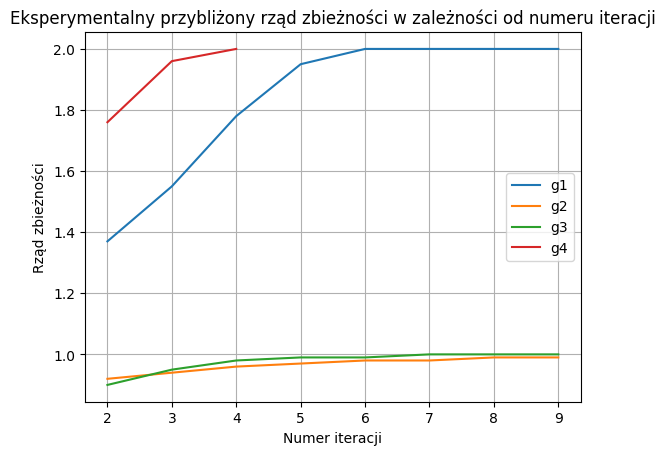

In [41]:
plt.plot(np.arange(2,10), convergence_order_df["g1"], label="g1")
plt.plot(np.arange(2,10), convergence_order_df["g2"], label="g2")
plt.plot(np.arange(2,10), convergence_order_df["g3"], label="g3")
plt.plot(np.arange(2,10), convergence_order_df["g4"], label="g4")
plt.legend()
plt.grid()
plt.xlabel("Numer iteracji")
plt.ylabel("Rząd zbieżności")
plt.title("Eksperymentalny przybliżony rząd zbieżności w zależności od numeru iteracji")
plt.show()

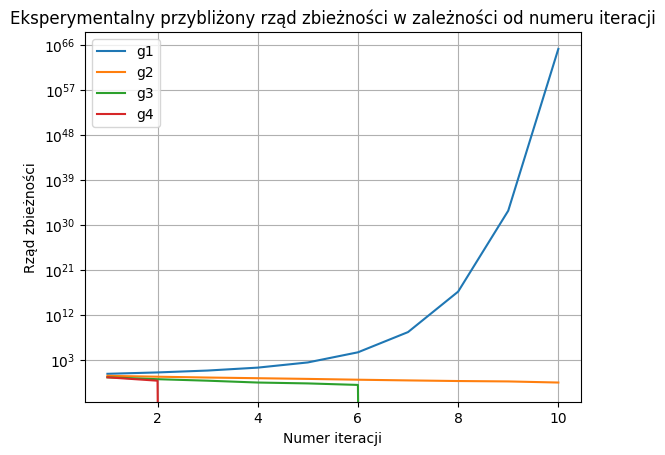

In [48]:
plt.semilogy(np.arange(1,11), error_df["g1"], label="g1")
plt.semilogy(np.arange(1,11), error_df["g2"], label="g2")
plt.semilogy(np.arange(1,11), error_df["g3"], label="g3")
plt.semilogy(np.arange(1,11), error_df["g4"], label="g4")
plt.legend()
plt.grid()
plt.xlabel("Numer iteracji")
plt.ylabel("Błąd bezwzględny")
plt.title("Błąd bezwzględny w zależności od numeru iteracji")
plt.show()

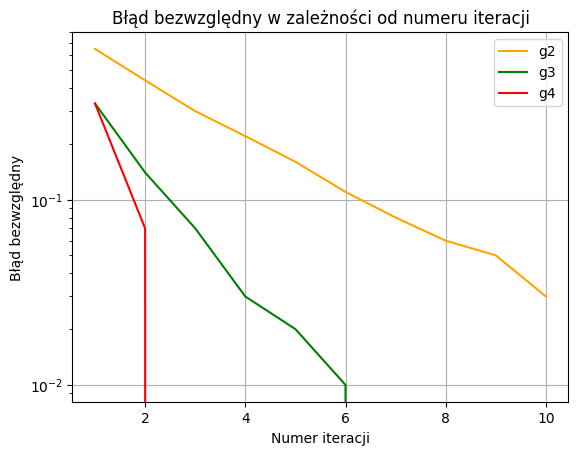

In [50]:
plt.semilogy(np.arange(1,11), error_df["g2"], label="g2", color="orange")
plt.semilogy(np.arange(1,11), error_df["g3"], label="g3", color="green")
plt.semilogy(np.arange(1,11), error_df["g4"], label="g4", color="red")
plt.legend()
plt.grid()
plt.xlabel("Numer iteracji")
plt.ylabel("Błąd bezwzględny")
plt.title("Błąd bezwzględny w zależności od numeru iteracji")
plt.show()